**LOGICA DE FUZZY COM PYTHON: ESTUDO DE CASO GORJETA **

Antecedentes ( ENTRADAS )

Servio: que nota você daria para o serviço, em uma escala de 0 a 10

  * Ruim, Aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10

  * Ruim, boa, Saborosa

Consequentes ( SAÍDAS )

Gorjetas: quanta gorjeta você daria, entre 0% e 20%

  * Baixa, média, alta

REGRAS!!

    * Se a qualidade da comida for ruim ou o serviço for ruim então, a gorjeta será baixa.
    * Se o serviço for médio então, a gorjeta será média
    * Se o serviço for bom e a qualidade da comida for saborosa, então a gorjeta sera alta


**Instalação e importação das bibliotecas**

    * Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html


In [177]:
#INSTALAÇÃO DA BIBLIOTECA PIP PARA USO!!
!pip install scikit-fuzzy

In [178]:
import numpy as np #biblioteca cientifica do Python!!
import skfuzzy as fuzzy # Biblioteca de Fuzzy!!!
from skfuzzy import control as ctrl #importação da biblioteca de controle

***ANTECEDENTES E CONSEQUENTE***

In [179]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [180]:
#Criando as duas variaveis correlacionadas ao antecedentes = Qualidade e Serviço!!
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [181]:
qualidade #visualizando o tipo de variavel

Antecedent: qualidade

In [182]:
qualidade.universe #Verificar os possiveis valores para essa variavel ! / Valores que podem ser informados!!

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [183]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [184]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

**MENBERSHIP FUNCTIONS *** FUNÇÃO DE PERTINENCIA PARA GERAR GRAFICOS!!!


In [185]:
qualidade.automf(number = 3, names = [ 'ruim', 'boa', 'saborosa'])#Variavel que vai mapear os valores numericos para 3 catedorias!!
servico.automf(number = 3, names = ['ruim', 'aceitável', 'ótimo'])##Variavel que vai mapear os valores numericos para 3 catedorias!!

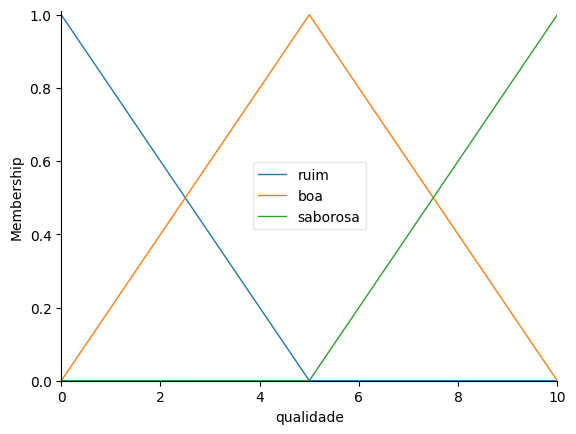

In [186]:
qualidade.view()

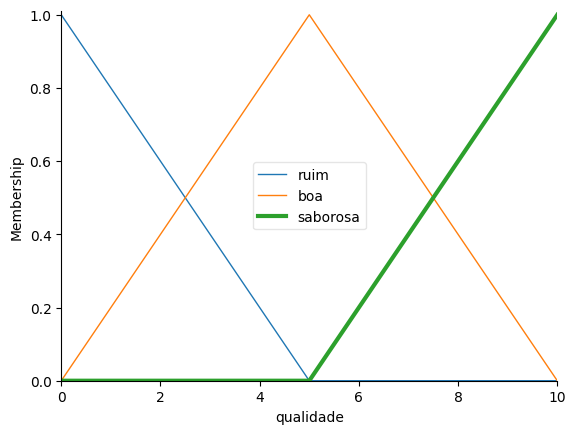

In [187]:
qualidade['saborosa'].view()#consigo dar enfase no dado que queiro analisar = analisar sua pertinencia !!!

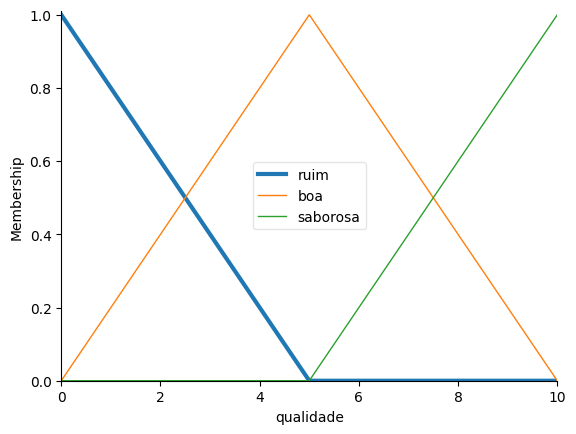

In [188]:
qualidade['ruim'].view()#consigo dar enfase no dado que queiro analisar = analisar sua pertinencia !!!

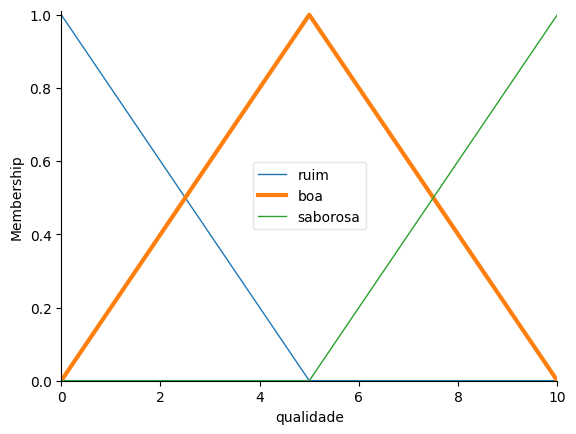

In [189]:
qualidade['boa'].view()#consigo dar enfase no dado que queiro analisar = analisar sua pertinencia !!!

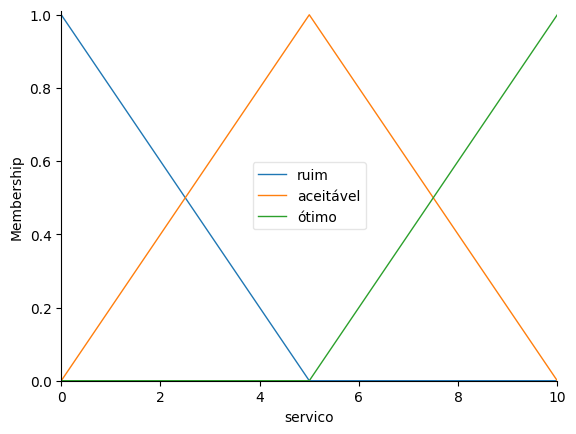

In [190]:
servico.view()

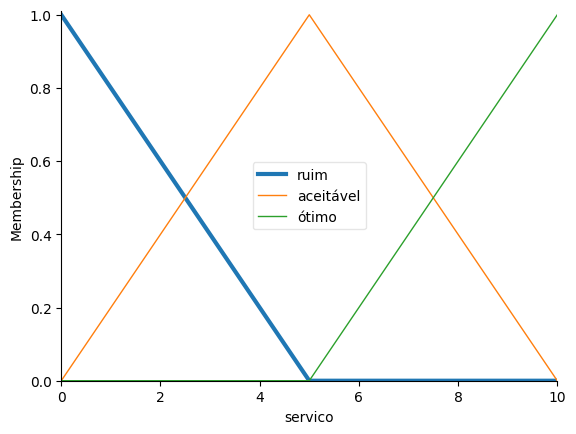

In [191]:
servico['ruim'].view()#consigo dar enfase no dado que queiro analisar = analisar sua pertinencia !!!

In [192]:
gorjeta.universe #verificando os dados da variavel gorjeta!

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [193]:
gorjeta['Baixa'] = fuzzy.trimf(gorjeta.universe, [0, 0, 10])#trimf seria uma função triangular!!
#OBS: LEMBRANDO QUE MUDEI O NOME DA BIBLIOTECA PARA FUZZY, PARA UTILIZAÇÃO - VARIAVEl DE ACESSO: 'FUZZY'
gorjeta['Media'] = fuzzy.trimf(gorjeta.universe, [0, 10, 20])
gorjeta['Alta'] = fuzzy.trimf(gorjeta.universe, [10, 20, 20])

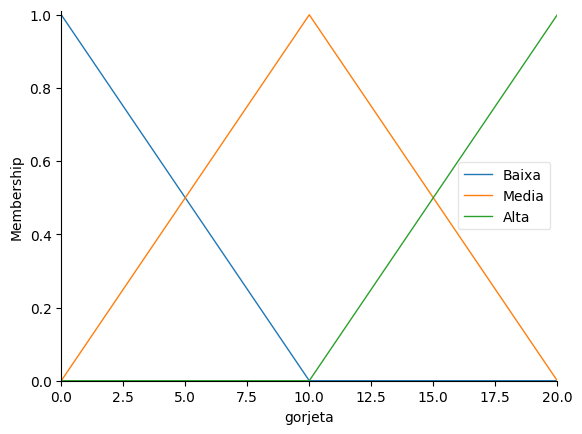

In [194]:
gorjeta.view()

In [195]:
#cadastrar as regras para defuzzificação
#LEMBRANDO QUE PODEMOS CADASTRAR CADA REGRA DEACORDO COM O NOSSO CENARIO!!
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['Baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['Media'])
regra3 = ctrl.Rule(qualidade['boa'] & servico['ótimo'], gorjeta['Alta'])

## **SISTEMAS DE CONTROLES**

  * Realizar o resultado ou previsão executando o processo de DEFUZZIFICAÇÃO!!

In [196]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])#passando as regras no sistemas de lista!

In [197]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)#

In [198]:
sistema.input['qualidade'] = 8.5
sistema.input['servico'] = 6.5
sistema.compute()#função usada para enviar os valores e receber os resultados da logica fuzzy!!

10.424083769633503


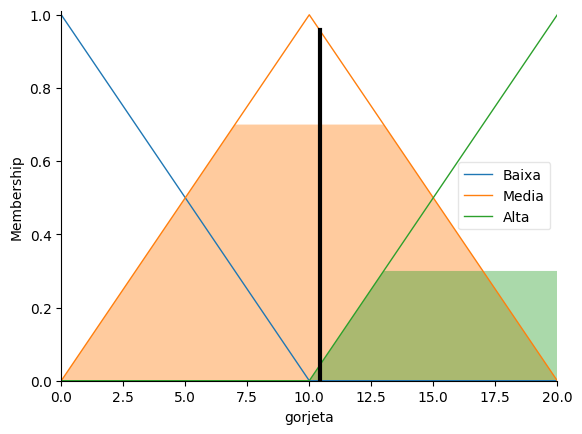

In [199]:
print(sistema.output['gorjeta'])#VER A PERTINENCIA DA MINHA GORJETA!!
gorjeta.view(sim = sistema)#POSSO GERAR O GRAFICO PARA FACILITAR A CONFERENCIA DOS DADOS !!

### **OUTRAS FUNÇÕES DE PERTINENCIA **

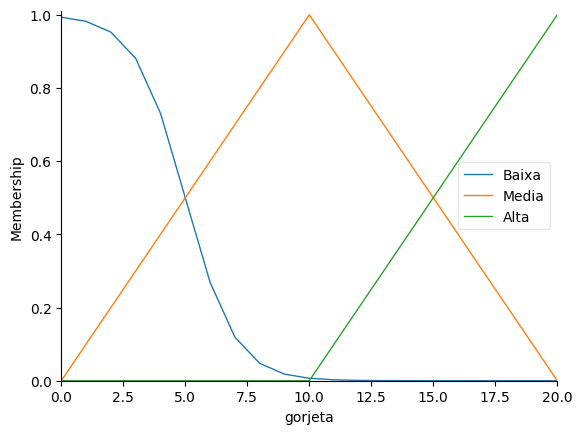

In [200]:
gorjeta['Baixa'] = fuzzy.sigmf(gorjeta.universe, 5, -1)
#LEMBRANDO QUE CADA DADO COLOCADO NA FUNÇÃO, VAI MUDAR A METRICA DE NOSSO GRAFICO!
#SE ALTERAR O PRIEMRIO DADO, VAMOS UDAR O PERIODO DE DECAIMENTO DE NOSSO MODELO
#SE MUDAR O SEGUNDO DADO "-1", VAMOS MUDAR O ICIO DE NOSSO MODELO
gorjeta.view()

#VOU DEIXAR O OUTRO EXEMPLO A BAIXO!

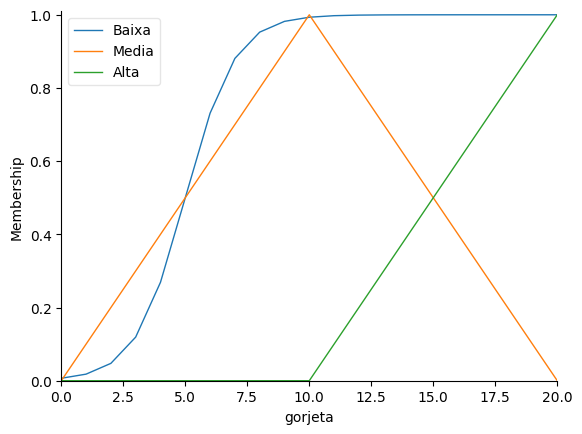

In [201]:
gorjeta['Baixa'] = fuzzy.sigmf(gorjeta.universe, 5, 1)
#LEMBRANDO QUE CADA DADO COLOCADO NA FUNÇÃO, VAI MUDAR A METRICA DE NOSSO GRAFICO!
#SE ALTERAR O PRIEMRIO DADO, VAMOS UDAR O PERIODO DE DECAIMENTO DE NOSSO MODELO
#SE MUDAR O SEGUNDO DADO "-1", VAMOS MUDAR O ICIO DE NOSSO MODELO
gorjeta.view()

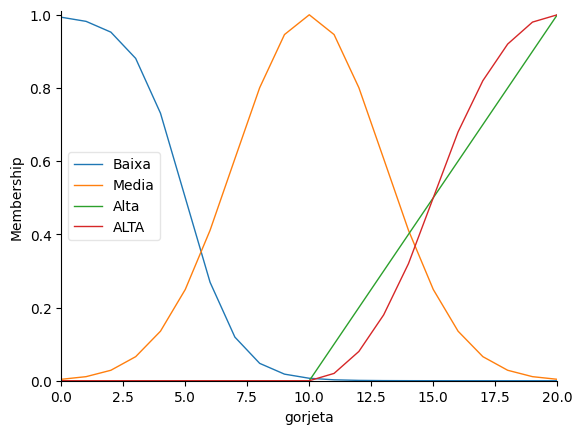

In [202]:
gorjeta['Baixa'] = fuzzy.sigmf(gorjeta.universe, 5, -1)
gorjeta['Media'] = fuzzy.gaussmf(gorjeta.universe, 10, 3)#FUNÇÃO GAUSIANA (OBS! VIEW)
gorjeta['ALTA'] = fuzzy.pimf(gorjeta.universe, 10, 20, 20, 21)
#=========================================================================================

#LEMBRANDO QUE CADA DADO COLOCADO NA FUNÇÃO, VAI MUDAR A METRICA DE NOSSO GRAFICO!
#SE ALTERAR O PRIEMRIO DADO, VAMOS UDAR O PERIODO DE DECAIMENTO DE NOSSO MODELO
#SE MUDAR O SEGUNDO DADO "-1", VAMOS MUDAR O ICIO DE NOSSO MODELO
gorjeta.view()

In [203]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['Baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['Media'])
regra3 = ctrl.Rule(qualidade['boa'] & servico['ótimo'], gorjeta['Alta'])

In [204]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])


In [205]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [207]:
sistema.input['qualidade'] = 9
sistema.input['servico'] = 8
sistema.compute()

11.01821123769462


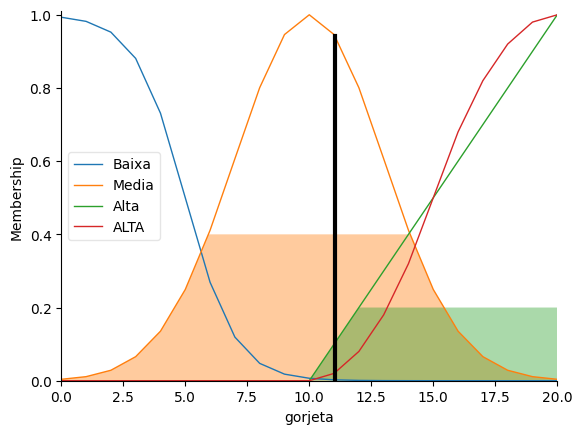

In [208]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)